In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/bigcontest2019/data/" # address of our files

test  train


In [0]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (15, 8)

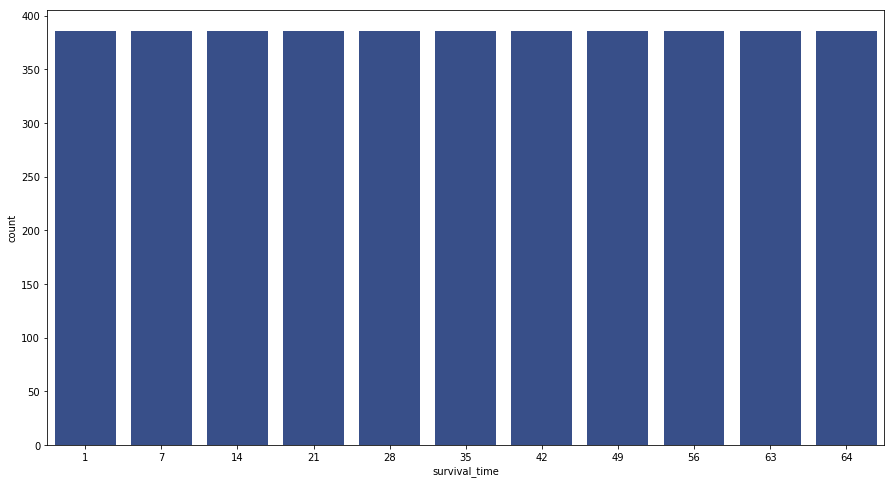

In [10]:
sns.barplot(x='survival_time', y='count', data=pd.DataFrame([[1, 386], [7, 386], [14, 386], [21, 386], [28, 386], 
                                                             [35, 386], [42, 386], [49, 386], [56, 386], [63, 386], [64, 386]], columns=['survival_time', 'count']), color='#2B4996')

In [0]:
path = '/gdrive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n')

['train_payment.csv', 'train_trade.csv', 'train_pledge.csv', 'train_combat.csv', 'train_label.csv', 'train_activity.csv'] 



In [0]:
train_label = pd.read_csv(path+'train/'+'train_label.csv')
train_activity = pd.read_csv(path+'train/'+'train_activity.csv')

- 유저 특성 나눌 수 있는 기준들
  * 주말만 / 주중만 / 상관없이 플레이
  * 신규유저 / 기존유저
  * 돈 많이 / 돈 적게 (정기 패키지 정도만) / 돈 안 쓴 유저
  * 사냥형 / 상점형 / 낚시형 / ...
  * 플레이 시간이 긴 열혈유저 / 일반유저 / 깨작깨작 하는 유저
  
- exp 관련 고려사항
  * 지난 1주일 얻은 경험치 대비 경험치 수치 (고렙일수록 경험치 획득량이 높지만 무의미하기 때문에)

In [0]:
path = '/gdrive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'test'),'\n')

['test1_activity.csv', 'test1_combat.csv', 'test2_activity.csv', 'test1_pledge.csv', 'test2_combat.csv', 'test2_trade.csv', 'test1_trade.csv', 'test1_payment.csv', 'test2_payment.csv', 'test2_pledge.csv'] 



In [0]:
test1_activity = pd.read_csv(path+'test/'+'test1_activity.csv')
test2_activity = pd.read_csv(path+'test/'+'test2_activity.csv')

In [0]:
pd.concat([train_activity['acc_id'].drop_duplicates(), test1_activity['acc_id'].drop_duplicates(), test2_activity['acc_id'].drop_duplicates()]).value_counts().sort_values(ascending=False)

2049      1
20490     1
51225     1
47127     1
4098      1
6147      1
8196      1
10245     1
12294     1
22539     1
61470     1
24588     1
26637     1
28686     1
32784     1
34833     1
36882     1
40980     1
59421     1
114744    1
121339    1
86058     1
114936    1
92205     1
65568     1
75813     1
77862     1
79911     1
84009     1
88107     1
         ..
104397    1
98256     1
124867    1
96209     1
94162     1
90068     1
88021     1
85974     1
81880     1
79833     1
53222     1
6141      1
10235     1
18423     1
26483     1
32752     1
51175     1
47081     1
45034     1
40940     1
38893     1
36846     1
34799     1
30705     1
118726    1
28658     1
24564     1
22517     1
20470     1
2047      1
Name: acc_id, Length: 80000, dtype: int64

In [0]:
train_activity.tail()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1601829,28,49021,109142,bs,1.149262,0.0,0.0,0.0,0.0,0,0.245883,0.247337,0.0,0.0,0.0,0.000247,0.0
1601830,28,54844,117439,bs,1.132877,0.0,0.0,0.0,0.0,0,0.245883,0.247337,0.0,0.0,0.0,-0.000308,0.0
1601831,28,60388,78905,bs,1.137558,0.0,0.0,0.0,0.0,0,0.245883,0.247337,0.0,0.0,0.0,-0.003670,0.0
1601832,28,72319,196592,bs,1.142240,0.0,0.0,0.0,0.0,0,0.491767,0.494674,0.0,0.0,0.0,-0.002003,0.0
1601833,28,73739,383802,bs,1.125855,0.0,0.0,0.0,0.0,0,0.491767,0.494674,0.0,0.0,0.0,0.001131,0.0


In [0]:
train_activity['server'].unique()

array(['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak',
       'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av',
       'aw', 'ax', 'ay', 'az', 'bb', 'bc', 'bd', 'bg', 'bi', 'bj', 'bk',
       'bl', 'bm', 'bn', 'bo', 'br', 'bs', 'bp'], dtype=object)

In [0]:
train_sum = train_activity.drop(['char_id', 'server'], axis=1).groupby(['acc_id', 'day']).sum().reset_index()
test1_sum = test1_activity.drop(['char_id', 'server'], axis=1).groupby(['acc_id', 'day']).sum().reset_index()
test2_sum = test2_activity.drop(['char_id', 'server'], axis=1).groupby(['acc_id', 'day']).sum().reset_index()

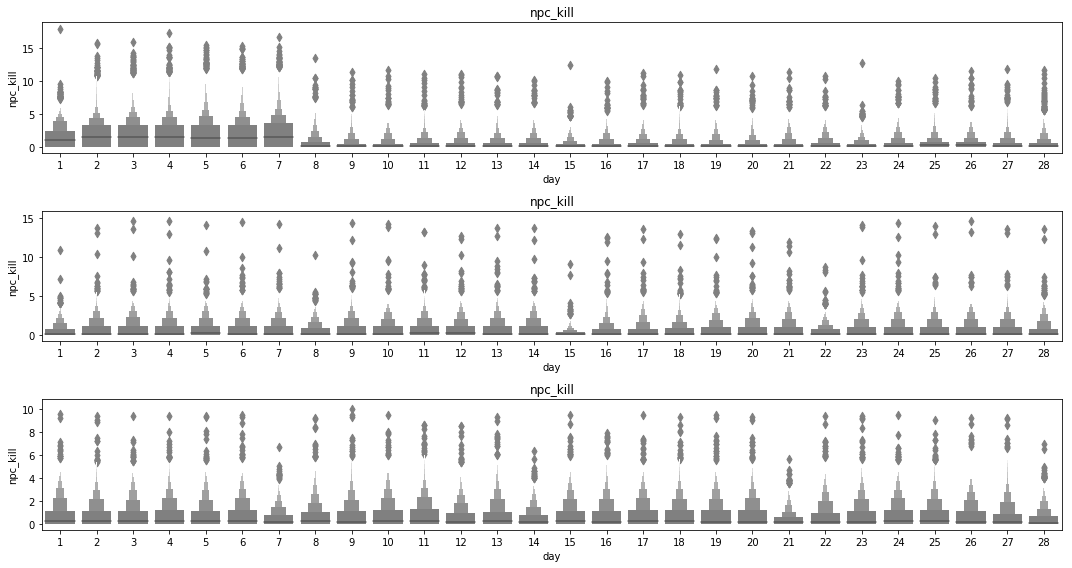

In [0]:
plt.subplot(3,1,1)
sns.boxenplot(x='day', y= 'npc_kill', color='gray', data=train_sum)
plt.title('npc_kill')

plt.subplot(3,1,2)
sns.boxenplot(x='day', y= 'npc_kill', color='gray', data=test1_sum)
plt.title('npc_kill')

plt.subplot(3,1,3)
sns.boxenplot(x='day', y= 'npc_kill', color='gray', data=test2_sum)
plt.title('npc_kill')

plt.tight_layout()
plt.show()

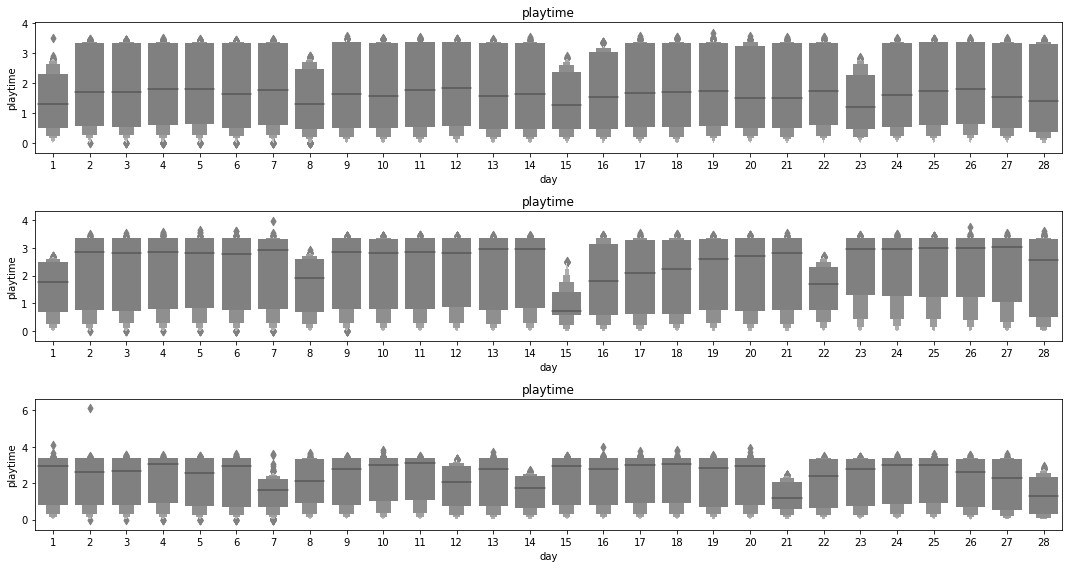

In [0]:
plt.subplot(3,1,1)
sns.boxenplot(x='day', y= 'playtime', color='gray', data=train_sum)
plt.title('playtime')

plt.subplot(3,1,2)
sns.boxenplot(x='day', y= 'playtime', color='gray', data=test1_sum)
plt.title('playtime')

plt.subplot(3,1,3)
sns.boxenplot(x='day', y= 'playtime', color='gray', data=test2_sum)
plt.title('playtime')

plt.tight_layout()
plt.show()

- train, test1은 1, 8, 15, 22가 업데이트일 (예외적으로 train의 23일에 업데이트를 한 것 같다)
- test2는 7, 14, 21, 28이 업데이트일

[링크 텍스트](https://lineage.plaync.com/board/notice/view?articleId=3993717&page=3&query=%EC%A0%95%EA%B8%B0%20%EC%A0%90%EA%B2%80&searchType=title&categoryId=0&viewMode=list&size=*20*)

이걸 보면 train의 22일이 2018년 6월 14일 혹은 8월 16일 혹은 9월 27일이 아닐까 싶음

test2의 28일은 1월 17일임. 즉, test2는 2018년 12월 21일 ~ 2019년 1월 17일

test2의 라벨 기간은 2019년 1월 18일 ~ 2019년 3월 28일

만약에 nc에서 준 데이터 구성이 맞다면 6월 14일이 가능성 높음 (계산이 딱 잘 맞지는 않은데 train 레이블 기간과 test1 관측 기간 사이에 텀이 좀 길게 있다고 하면 나머지가 기간이 안 맞음)

In [0]:
train_label.head()

,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593
3,104483,64,0.016241
4,4704,20,0.226396


In [0]:
train_label['sxa'] = train_label['survival_time']*train_label['amount_spent']

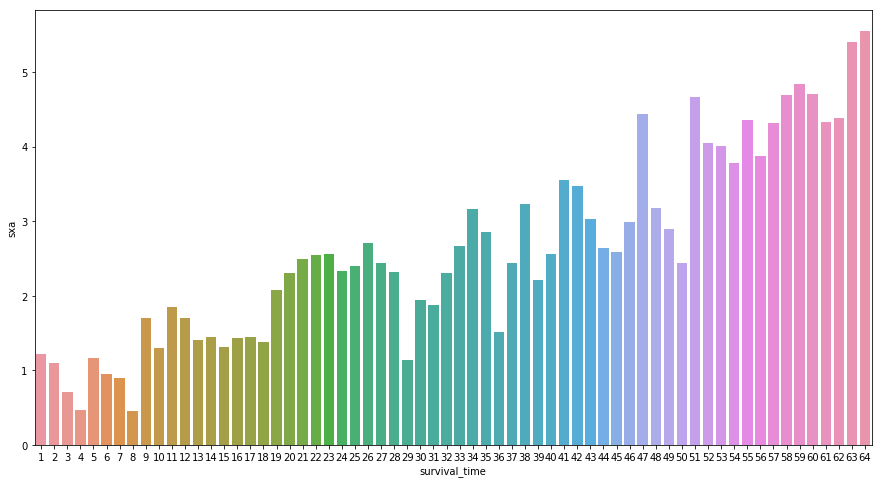

In [0]:
sns.barplot(x='survival_time', y='sxa', data=train_label.groupby('survival_time')['sxa'].mean().reset_index())

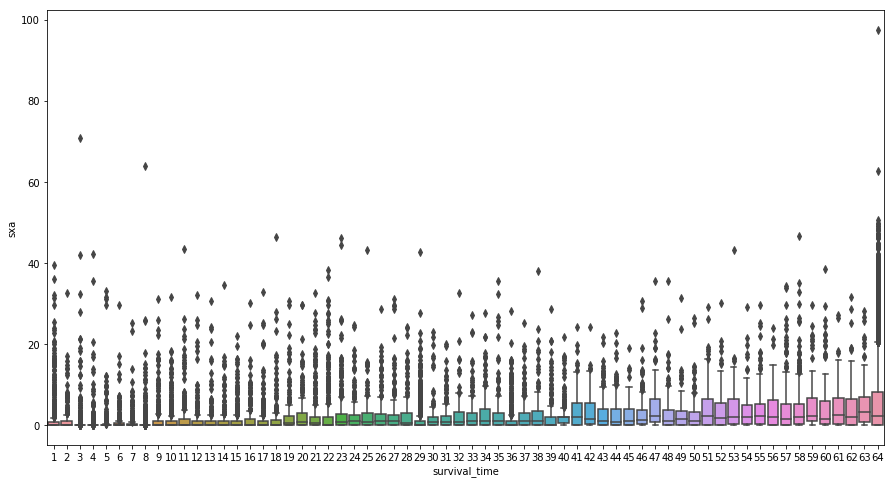

In [0]:
sns.boxplot(x='survival_time', y='sxa', data=train_label)

In [0]:
payment = pd.read_csv(path + 'train/' + 'train_payment.csv')

In [0]:
payment.head()

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204
3,17,12351,0.528062
4,11,125437,0.633674


In [0]:
train_sum.head()

,acc_id,day,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,2,1,2.703457,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0
1,2,2,3.363522,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.149118,-1.044201,0.0
2,2,3,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.183447,0.451317,0.0
3,2,4,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.131992,-0.007230,0.0
4,2,5,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135698,0.015398,0.0


In [0]:
activity_payment_merged = pd.merge(train_sum, payment, on=['acc_id', 'day'], how='inner')

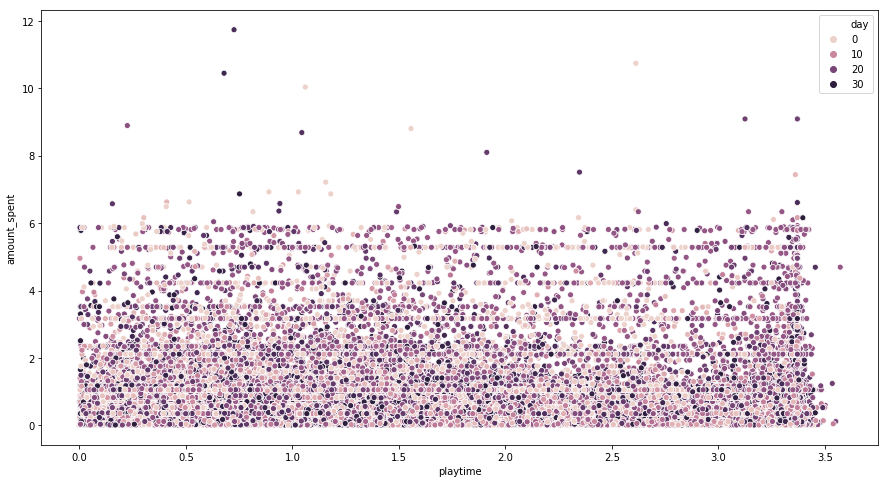

In [0]:
sns.scatterplot(x='playtime', y='amount_spent', hue='day', data=activity_payment_merged)
#sns.regplot(x='playtime', y='amount_spent', hue='day', data=activity_payment_merged)

In [0]:
paysum = payment.groupby(['acc_id', 'day'])['amount_spent'].sum().reset_index()

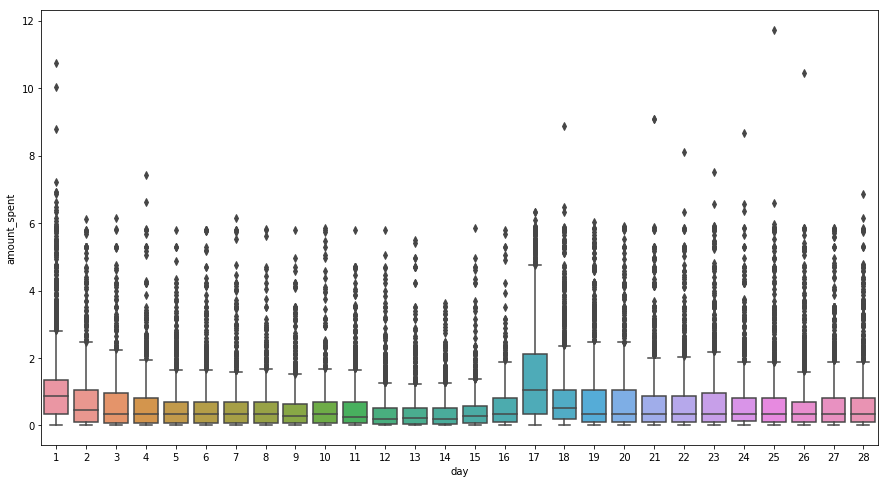

In [0]:
sns.boxplot(x='day', y='amount_spent', data=paysum)

In [0]:
payment_test1 = pd.read_csv(path + 'test/' + 'test1_payment.csv')

In [0]:
payment_test1.head()

,day,acc_id,amount_spent
0,15,4617,0.621939
1,16,4617,2.675512
2,17,4617,0.211225
3,18,4617,0.246429
4,22,4617,1.196940


In [0]:
paysum_test1 = payment_test1.groupby(['acc_id', 'day'])['amount_spent'].sum().reset_index()

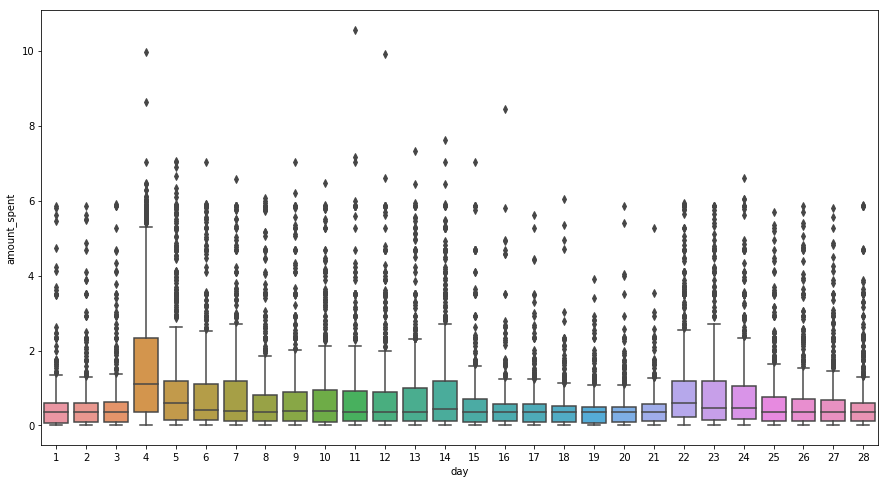

In [0]:
sns.boxplot(x='day', y='amount_spent', data=paysum_test1)

In [0]:
payment_test2 = pd.read_csv(path + 'test/' + 'test2_payment.csv')

In [0]:
payment_test2.head()

,day,acc_id,amount_spent
0,23,93509,0.674745
1,26,93509,0.176021
2,8,14183,0.585562
3,9,14183,0.234694
4,10,14183,1.760205


In [0]:
paysum_test2 = payment_test2.groupby(['acc_id', 'day'])['amount_spent'].sum().reset_index()

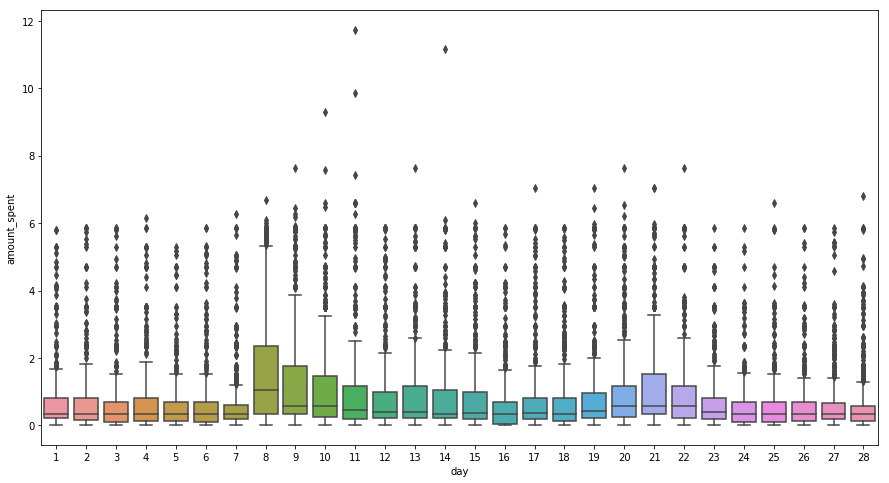

In [0]:
sns.boxplot(x='day', y='amount_spent', data=paysum_test2)

# 주말, 주중 / 매일, 가끔 유형 분리

In [0]:
train_activity.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


In [0]:
# 주말 태깅
train_activity['weekend'] = np.where(train_activity['day'].isin([4,5, 11,12, 18,19, 25,26]), 1, 0)
# 주중 태깅
train_activity['weekdays'] = np.where(~train_activity['day'].isin([4,5, 11,12, 18,19, 25,26]), 1, 0)

In [0]:
train_activity.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,weekend,weekdays
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0,0,1
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0,0,1
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0,0,1
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0,0,1
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0,0,1


In [0]:
activity_agg = {
        'day':'nunique', 'char_id':'nunique','server':'nunique', 'playtime':'sum', 'npc_kill':'sum', 
        'solo_exp':'sum','party_exp':'sum','quest_exp':'sum','rich_monster':'sum', 
        'death':'sum', 'revive':'sum','exp_recovery':'sum','fishing':'sum','private_shop':'sum',
        'game_money_change':'sum', 'enchant_count':'sum',
        'weekend':'sum', 'weekdays':'sum'}

In [0]:
train_activity.groupby('acc_id').agg(activity_agg).reset_index().head()

,acc_id,day,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,weekend,weekdays
0,2,28,1,1,91.533663,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,84.900753,-0.008746,0.0,8,20
1,5,10,3,1,6.116132,3.236452,2.155434,0.695285,0.111055,9,0.245883,0.247337,0.0,3.442909,0.000000,0.145146,0.0,3,15
2,8,28,7,1,18.797802,31.172609,31.489136,0.000000,1.561055,2,91.960416,92.504000,0.0,4.807823,0.000000,0.020353,0.0,37,96
3,17,28,4,1,28.464708,30.456852,9.255848,8.823094,2.322365,21,1.721184,1.731358,0.0,13.990954,0.000000,-0.027696,0.0,17,35
4,20,27,2,4,25.588043,34.100184,0.274902,0.080060,0.083483,8,0.983534,0.989348,0.0,4.295766,2.917510,-0.370192,0.0,11,27


In [0]:
train_activity.loc[train_activity['acc_id'] == 38].head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,weekend,weekdays
36399,1,38,23475,au,0.161505,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,1
36400,1,38,67497,au,0.842636,5.542894,0.008591,0.000149,0.0,0,0.0,0.0,0.0,0.000000,0.0,-0.027539,0.0,0,1
54133,1,38,67497,bk,0.142780,0.224730,0.000510,0.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,1
54569,1,38,67497,bm,0.706878,1.044573,0.002458,0.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,1
90707,2,38,67497,au,2.438963,5.642248,0.009318,0.000000,0.0,0,0.0,0.0,0.0,1.558915,0.0,0.124307,0.0,0,1


- char_id로는 고려할 요소가 많아 단순히 묶기 어려움
- acc_id 위주로 가야할 듯



In [0]:
# 주말 태깅
train_sum['weekend'] = np.where(train_sum['day'].isin([4,5, 11,12, 18,19, 25,26]), 1, 0)
# 주중 태깅
train_sum['weekdays'] = np.where(~train_sum['day'].isin([4,5, 11,12, 18,19, 25,26]), 1, 0)

train_sum.head()

,acc_id,day,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,weekend,weekdays
0,2,1,2.703457,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0,0,1
1,2,2,3.363522,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.149118,-1.044201,0.0,0,1
2,2,3,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.183447,0.451317,0.0,0,1
3,2,4,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.131992,-0.007230,0.0,1,0
4,2,5,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135698,0.015398,0.0,1,0


In [0]:
train_week_group = train_sum.groupby('acc_id').sum().reset_index()[['acc_id', 'weekend', 'weekdays']]

In [0]:
train_week_group['weekend'] = train_week_group['weekend']/8
train_week_group['weekdays'] = train_week_group['weekdays']/20

In [0]:
week_label = pd.merge(train_week_group, train_label, on='acc_id', how='inner')

In [0]:
week_label['sc'] = np.where(week_label['survival_time'] == 64, 'survive', 'churn')
week_label['paid'] = np.where(week_label['amount_spent'] == 0, 'not_spent', 'spent')

week_label.head()

,acc_id,weekend,weekdays,survival_time,amount_spent,sxa,sc,paid
0,2,1.000,1.0,64,0.000000,0.000000,survive,not_spent
1,5,0.250,0.4,60,0.000000,0.000000,churn,not_spent
2,8,1.000,1.0,64,0.020310,1.299843,survive,spent
3,17,1.000,1.0,64,0.070642,4.521100,survive,spent
4,20,0.875,1.0,64,0.052137,3.336752,survive,spent


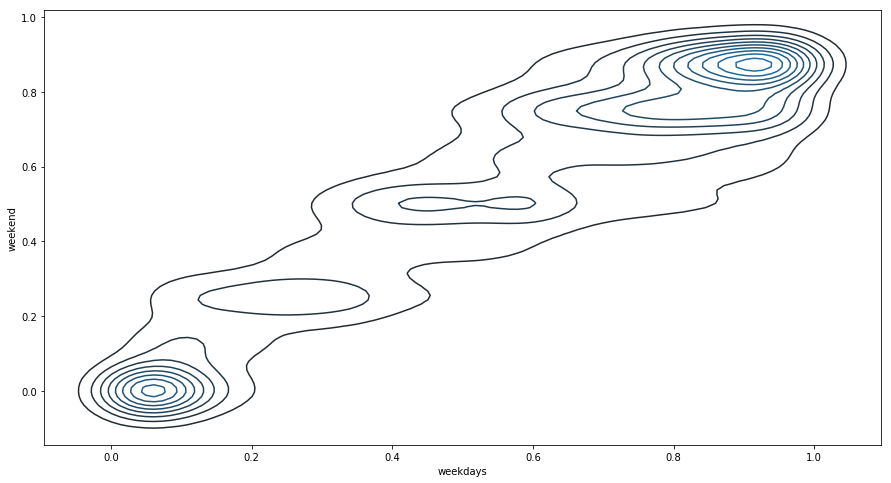

In [0]:
sns.kdeplot(week_label.loc[(week_label['weekdays']!=1.0) & (week_label['weekend']!=1.0), 'weekdays'], week_label.loc[(week_label['weekdays']!=1.0) & (week_label['weekend']!=1.0), 'weekend'])

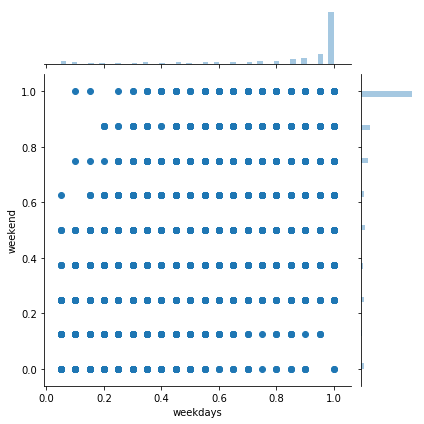

In [0]:
sns.jointplot('weekdays', 'weekend', data=week_label)

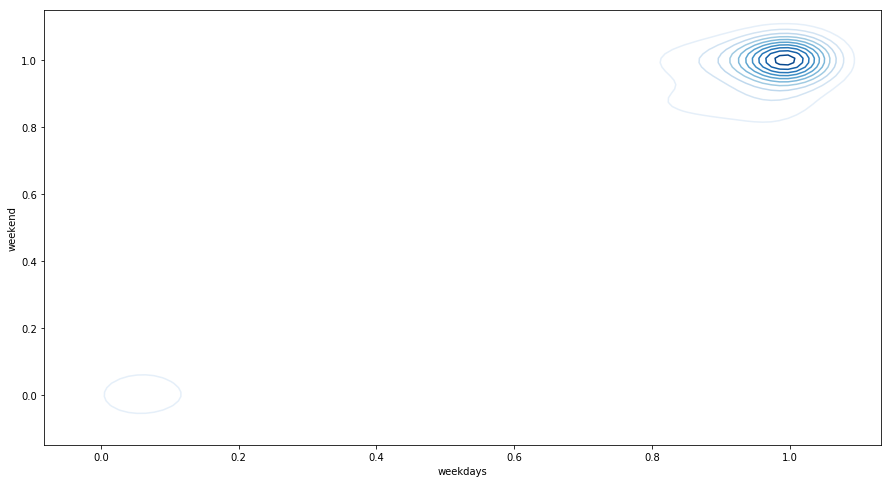

In [0]:
sns.kdeplot(week_label.loc[week_label['sc']=='churn', 'weekdays'], week_label.loc[week_label['sc']=='churn', 'weekend'], cmap="Blues")

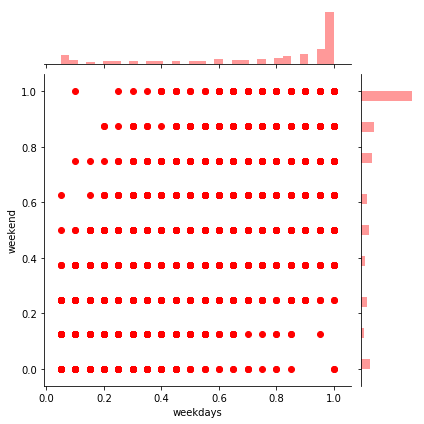

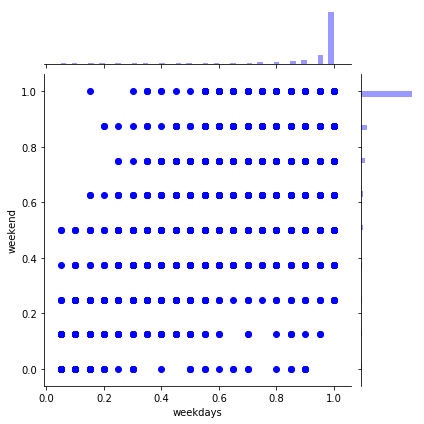

In [0]:
sns.jointplot(week_label.loc[week_label['sc']=='churn', 'weekdays'], week_label.loc[week_label['sc']=='churn', 'weekend'], color="Red")
sns.jointplot(week_label.loc[week_label['sc']=='survive', 'weekdays'], week_label.loc[week_label['sc']=='survive', 'weekend'], color="Blue")

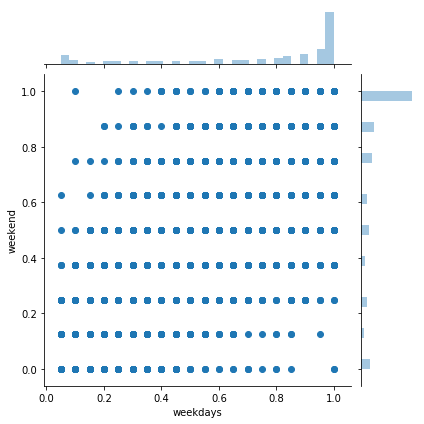

In [0]:
sns.jointplot(week_label.loc[week_label['sc']=='churn', 'weekdays'], week_label.loc[week_label['sc']=='churn', 'weekend'])

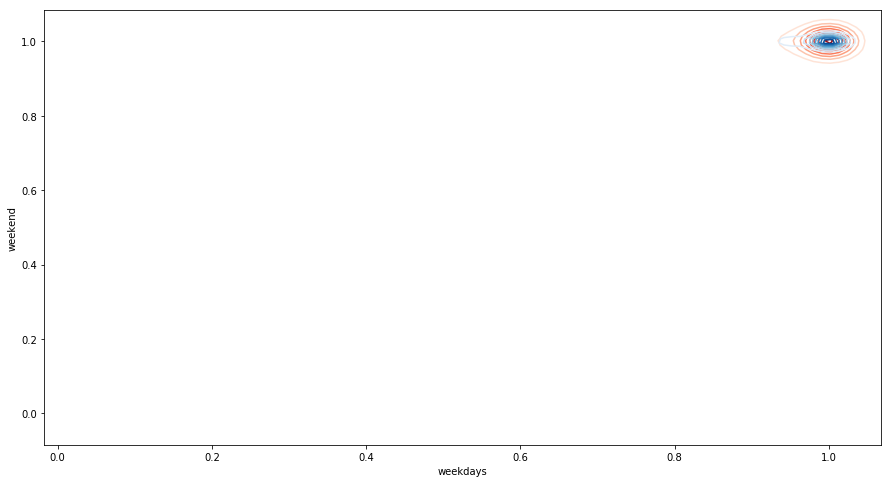

In [0]:
sns.kdeplot(week_label.loc[week_label['paid']=='not_spent', 'weekdays'], week_label.loc[week_label['paid']=='not_spent', 'weekend'], cmap="Reds")
sns.kdeplot(week_label.loc[week_label['paid']=='spent', 'weekdays'], week_label.loc[week_label['paid']=='spent', 'weekend'], cmap="Blues")

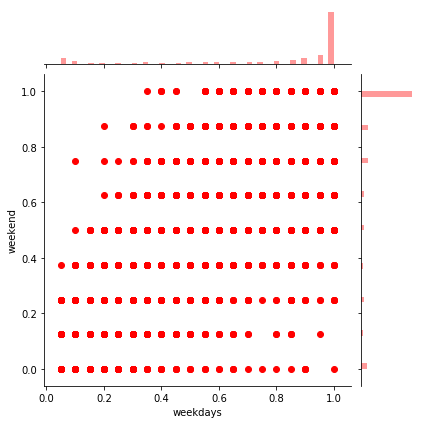

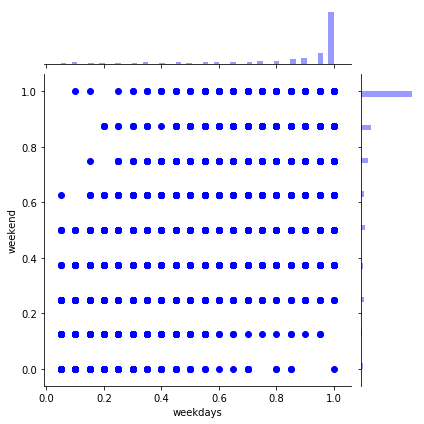

In [0]:
sns.jointplot(week_label.loc[week_label['paid']=='not_spent', 'weekdays'], week_label.loc[week_label['paid']=='not_spent', 'weekend'], color="Red")
sns.jointplot(week_label.loc[week_label['paid']=='spent', 'weekdays'], week_label.loc[week_label['paid']=='spent', 'weekend'], color="Blue")

- 대부분 주중주말 관계없이 28일 모두 접속한다
- 그 외의 사람들을 봐도 주중과 주말 접속 비율이 비례하는 꼴이라 나눠 볼 필요는 없다!
- 관찰 기간동안 접속이 모두 적은 사람들이 돈도 안 쓰고 이탈도 하 가능성 높다

# payment유무와 amount_spent

In [0]:
pay_yn = pd.merge(train_label.sort_values('acc_id'), payment.groupby('acc_id').sum()['amount_spent'].reset_index(), on='acc_id', how='left').rename(columns={'amount_spent_y':'spent_yn'}).fillna(0)
pay_yn.head()

,acc_id,survival_time,amount_spent_x,sxa,spent_yn
0,2,64,0.000000,0.000000,0.000000
1,5,60,0.000000,0.000000,0.000000
2,8,64,0.020310,1.299843,1.404644
3,17,64,0.070642,4.521100,0.000000
4,20,64,0.052137,3.336752,0.896531


In [0]:
pay_yn['spent_yn'] = np.where(pay_yn['spent_yn'] == 0, 0, 1)
pay_yn.head()

,acc_id,survival_time,amount_spent_x,sxa,spent_yn
0,2,64,0.000000,0.000000,0
1,5,60,0.000000,0.000000,0
2,8,64,0.020310,1.299843,1
3,17,64,0.070642,4.521100,0
4,20,64,0.052137,3.336752,1


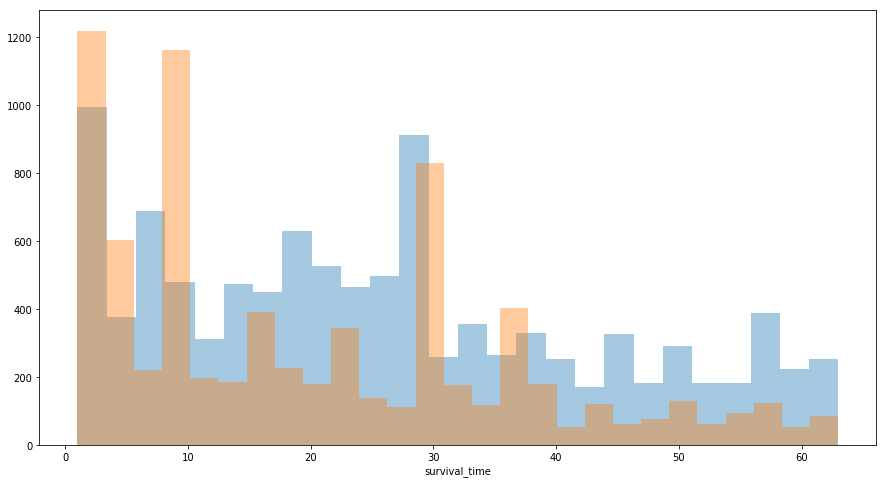

In [0]:
sns.distplot(pay_yn.loc[(pay_yn['spent_yn']==1) & (pay_yn['survival_time'] != 64), 'survival_time'], kde=False)
sns.distplot(pay_yn.loc[(pay_yn['spent_yn']==0) & (pay_yn['survival_time'] != 64), 'survival_time'], kde=False)
#plt.ylim(0, 10)

## weekly

In [0]:
payment['week'] = (payment['day']-1)//7 + 1
payment.head()

,day,acc_id,amount_spent,week
0,18,27835,0.826123,3
1,23,27835,0.011735,4
2,27,27835,0.035204,4
3,17,12351,0.528062,3
4,11,125437,0.633674,2


In [0]:
payweek = payment.groupby('acc_id').agg({'amount_spent':'sum','week':'nunique'}).reset_index()
payweek['week_type'] = np.where(payweek['week']==4, 2, 1)
payweek.head()

,acc_id,amount_spent,week,week_type
0,8,1.404644,2,1
1,20,0.896531,2,1
2,21,2.695461,2,1
3,38,6.309749,3,1
4,41,0.035204,1,1


In [0]:
pay_yn2 = pd.merge(train_label.sort_values('acc_id'), payweek, on='acc_id', how='left').fillna(0)
pay_yn2.head()

,acc_id,survival_time,amount_spent_x,sxa,amount_spent_y,week,week_type
0,2,64,0.000000,0.000000,0.000000,0.0,0.0
1,5,60,0.000000,0.000000,0.000000,0.0,0.0
2,8,64,0.020310,1.299843,1.404644,2.0,1.0
3,17,64,0.070642,4.521100,0.000000,0.0,0.0
4,20,64,0.052137,3.336752,0.896531,2.0,1.0


In [0]:
pay_yn2['spent_yn'] = np.sign(pay_yn2['amount_spent_y'])
pay_yn2['survive_yn'] = np.where(pay_yn2['survival_time']==64, 1, 0)
pay_yn2['total_spent'] = pay_yn2['survival_time'] * pay_yn2['amount_spent_x']
pay_yn2.head()

,acc_id,survival_time,amount_spent_x,sxa,amount_spent_y,week,week_type,spent_yn,survive_yn,total_spent
0,2,64,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000
1,5,60,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
2,8,64,0.020310,1.299843,1.404644,2.0,1.0,1.0,1,1.299843
3,17,64,0.070642,4.521100,0.000000,0.0,0.0,0.0,1,4.521100
4,20,64,0.052137,3.336752,0.896531,2.0,1.0,1.0,1,3.336752


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


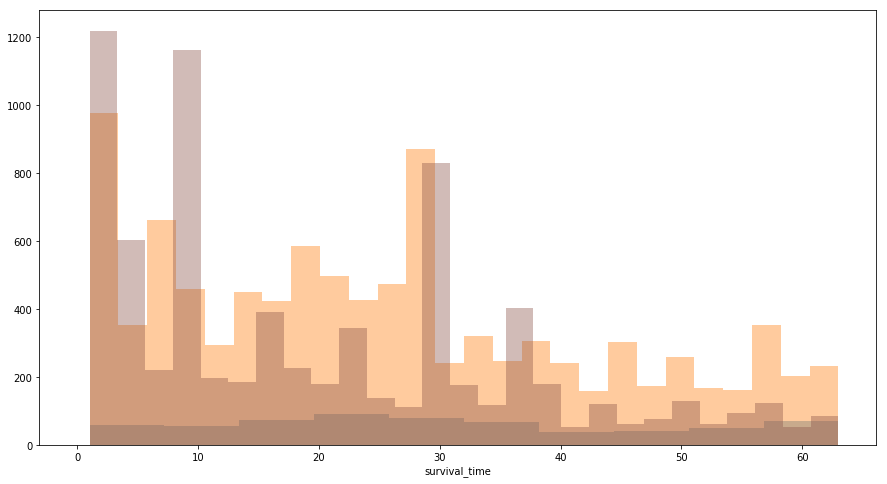

In [0]:
sns.distplot(pay_yn2.loc[(pay_yn2['spent_yn']==1) & (pay_yn2['week_type'] == 2) &
                         (pay_yn2['survival_time'] != 64), 'survival_time'], kde=False)
sns.distplot(pay_yn2.loc[(pay_yn2['spent_yn']==1) & (pay_yn2['week_type'] == 1) &
                         (pay_yn2['survival_time'] != 64), 'survival_time'], kde=False)
sns.distplot(pay_yn2.loc[(pay_yn2['spent_yn']==1) & (pay_yn2['week_type'] == 0) &
                         (pay_yn2['survival_time'] != 64), 'survival_time'], kde=False)
sns.distplot(pay_yn2.loc[(pay_yn2['spent_yn']==0) & (pay_yn2['week_type'] == 2) &
                         (pay_yn2['survival_time'] != 64), 'survival_time'], kde=False)
sns.distplot(pay_yn2.loc[(pay_yn2['spent_yn']==0) & (pay_yn2['week_type'] == 1) &
                         (pay_yn2['survival_time'] != 64), 'survival_time'], kde=False)
sns.distplot(pay_yn2.loc[(pay_yn2['spent_yn']==0) & (pay_yn2['week_type'] == 0) &
                         (pay_yn2['survival_time'] != 64), 'survival_time'], kde=False)

#plt.ylim(0, 10)

(0, 200)

<Figure size 1440x1080 with 0 Axes>

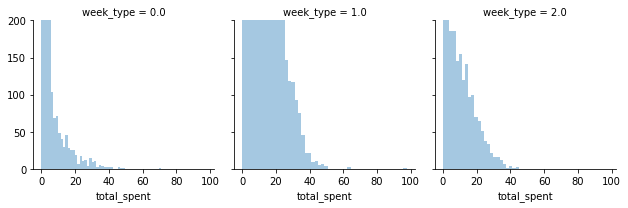

In [0]:
plt.figure(figsize=(20, 15))
sns.FacetGrid(data=pay_yn2, col='week_type').map(sns.distplot, 'total_spent', kde=False)
plt.ylim(0, 200)

In [0]:
(pay_yn2.loc[(pay_yn2['spent_yn']==0) & (pay_yn2['week_type']==0)].shape, 
pay_yn2.loc[(pay_yn2['spent_yn']==1) & (pay_yn2['week_type']==1)].shape,
pay_yn2.loc[(pay_yn2['spent_yn']==1) & (pay_yn2['week_type']==2)].shape)

((16274, 10), (21742, 10), (1984, 10))

- 4주 내내 돈을 썼다 / 1~3주 돈을 썼다 사이에 큰 차이 발견하기 어렵다
- payment 기간동안 돈을 썼다 / 안 썼다 두 가지 분류로 하는 게 나아보인다

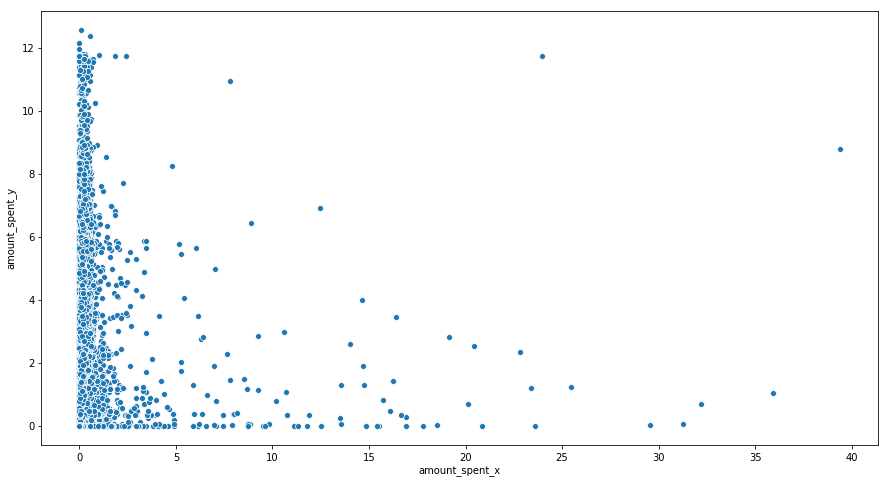

In [0]:
sns.scatterplot(pay_yn2['amount_spent_x'], pay_yn2['amount_spent_y'])

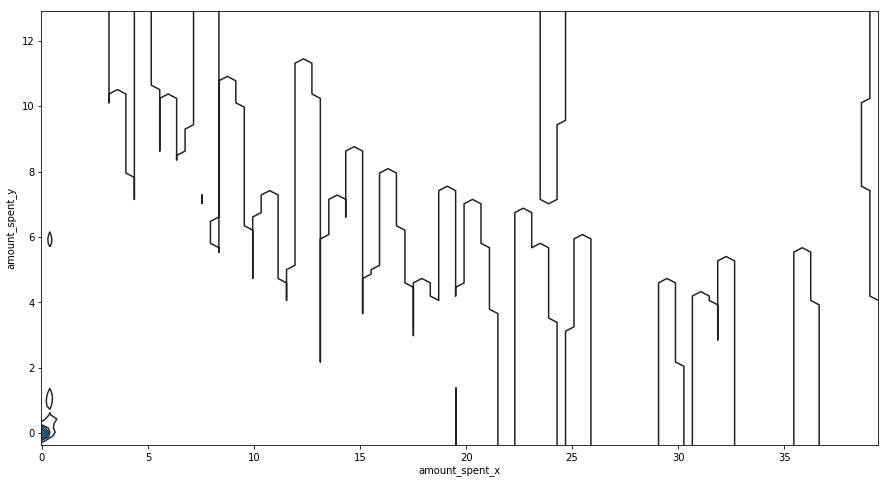

In [0]:
sns.kdeplot(pay_yn2['amount_spent_x'], pay_yn2['amount_spent_y'])

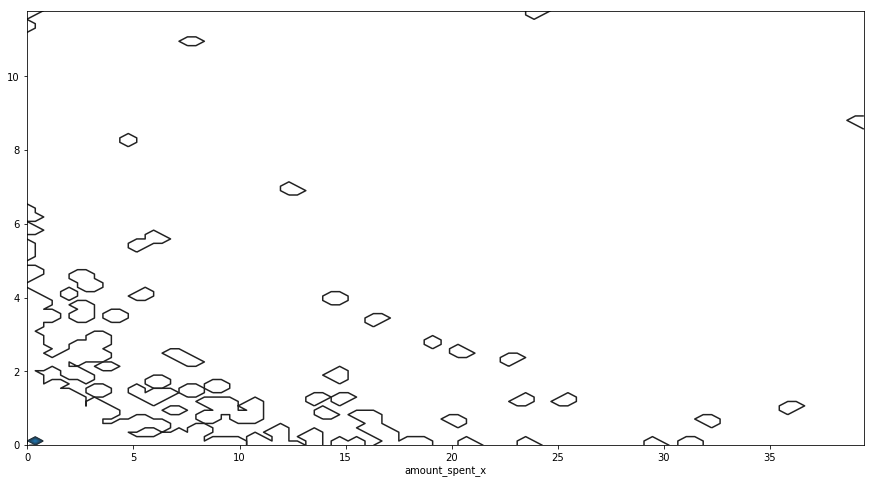

In [0]:
sns.kdeplot(pay_yn2['amount_spent_x'], pay_yn2['amount_spent_y'] / pay_yn2['survival_time'])

(0, 2)

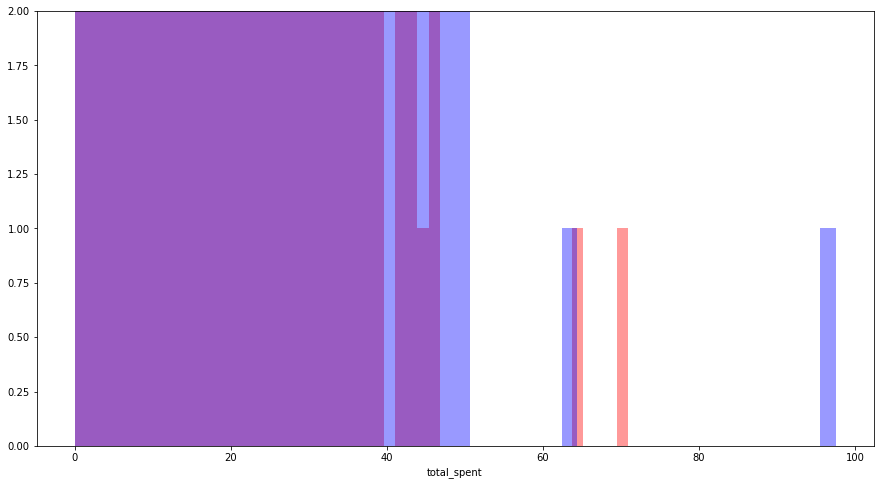

In [0]:
sns.distplot(pay_yn2.loc[pay_yn2['survive_yn']==0, 'total_spent'], kde=False, color='r')
sns.distplot(pay_yn2.loc[pay_yn2['survive_yn']==1, 'total_spent'], kde=False, color='b')
plt.ylim(0, 2)

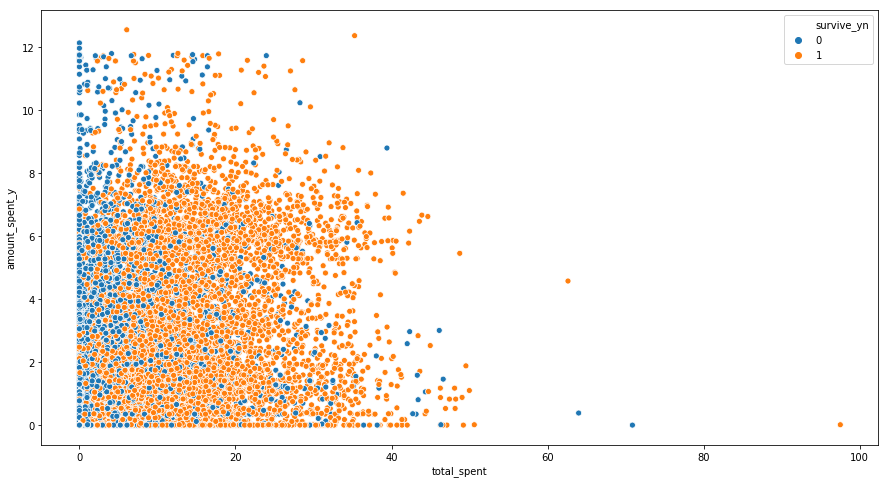

In [0]:
sns.scatterplot(pay_yn2['total_spent'], pay_yn2['amount_spent_y'], hue=pay_yn2['survive_yn'])

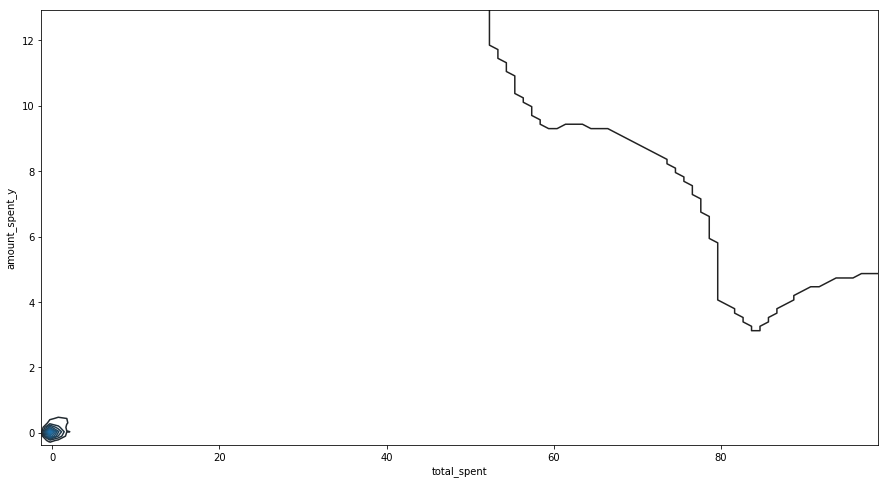

In [0]:
sns.kdeplot(pay_yn2['total_spent'], pay_yn2['amount_spent_y'])

# weekly user pattern

In [0]:
train_sum['week'] = ((train_sum['day']-1)//7)+1
train_sum['date'] = ((train_sum['day']-1)%7)+1
train_sum.head()

,acc_id,day,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,weekend,weekdays,week,date
0,2,1,2.703457,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0,0,1,1,1
1,2,2,3.363522,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.149118,-1.044201,0.0,0,1,1,2
2,2,3,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.183447,0.451317,0.0,0,1,1,3
3,2,4,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.131992,-0.007230,0.0,1,0,1,4
4,2,5,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135698,0.015398,0.0,1,0,1,5


In [0]:
train_label.loc[train_label['survival_time']==12]

,acc_id,survival_time,amount_spent,sxa
236,91096,12,0.000000,0.000000
460,28090,12,0.000000,0.000000
462,61433,12,0.000000,0.000000
508,61690,12,0.000000,0.000000
531,50557,12,0.446591,5.359094
567,23185,12,0.726896,8.722752
634,62455,12,0.002723,0.032680
775,119939,12,0.021754,0.261045
1104,1642,12,0.000000,0.000000
1469,112257,12,0.000000,0.000000


In [0]:
train_label.loc[train_label['acc_id'] == 75001]

,acc_id,survival_time,amount_spent,sxa
20406,75001,64,0.215798,13.811089


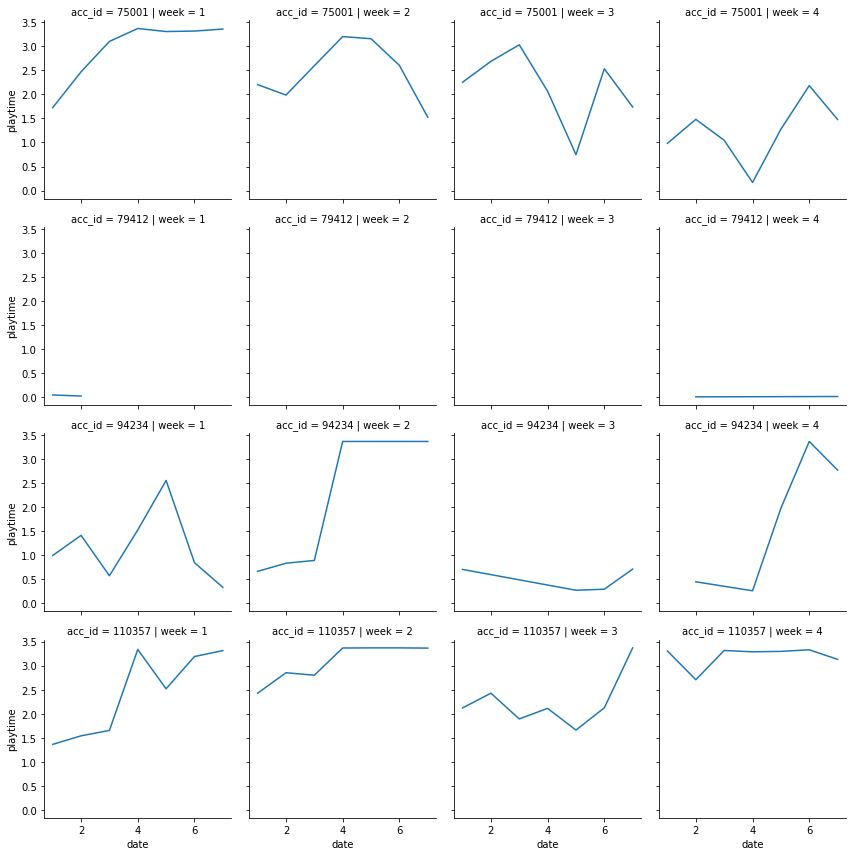

In [0]:
sns.FacetGrid(col='week', row='acc_id', data=train_sum.loc[train_sum['acc_id'].isin([75001, 79412, 110357, 94234])]).map(sns.lineplot, 'date', 'playtime', estimator=None, markers=True)

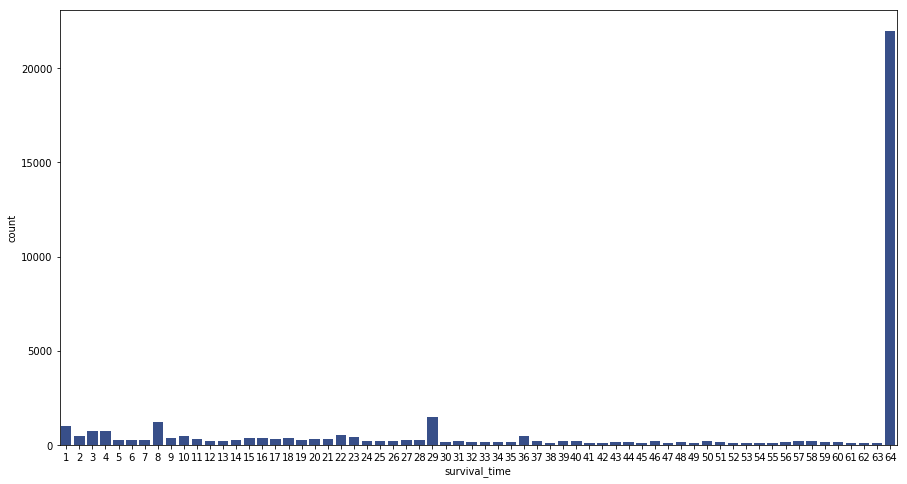

In [0]:
plt.figure(figsize=(15, 8))
sns.countplot(x='survival_time', data=train_label, color='#2B4996')

Text(0.5, 0, 'amount_spent')

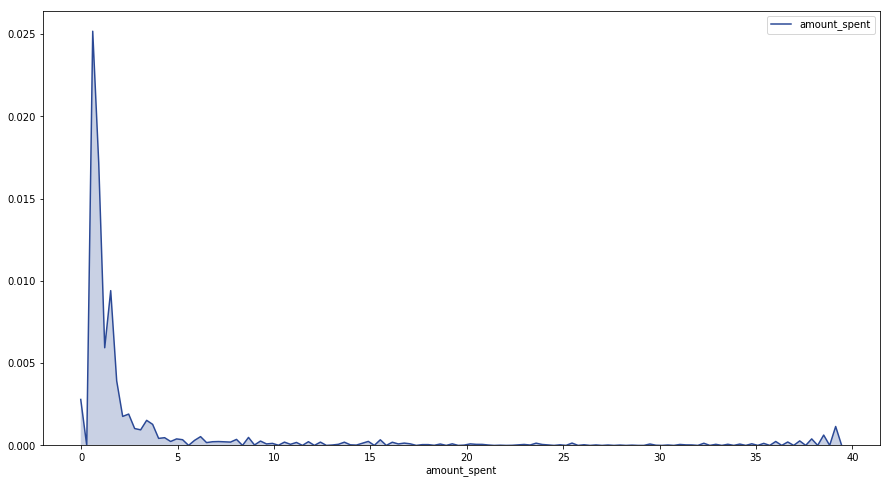

In [0]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=train_label['amount_spent'], shade=True, color='#2B4996')
plt.xlabel('amount_spent')

Text(0.5, 0, 'total_amount_spent')

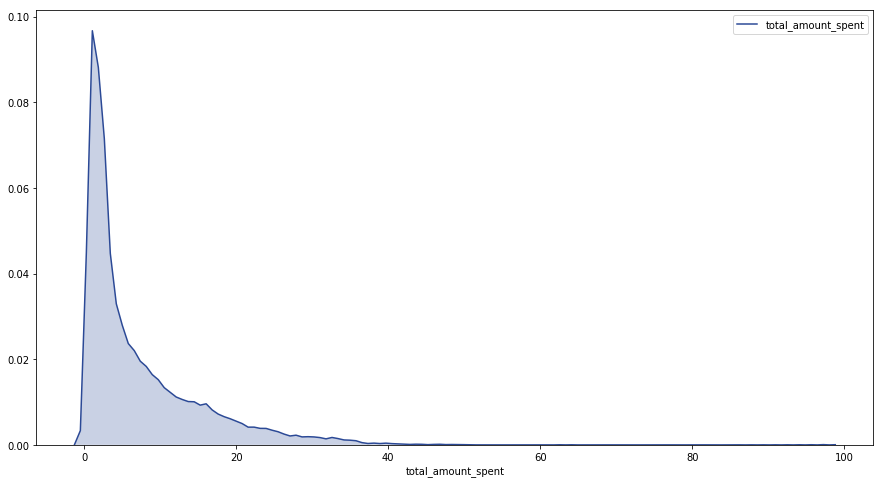

In [0]:
sns.kdeplot(data=train_label['total_amount_spent'], shade=True, color='#2B4996')
plt.xlabel('total_amount_spent')

In [0]:
train_label['total_amount_spent'] = train_label['survival_time'] * train_label['amount_spent']

In [0]:
sns.FacetGrid(col='week', data=train_sum.loc[train_sum['acc_id'] == 75001]).map(sns.lineplot, 'date', 'total_amount_spent', estimator=None)

In [0]:
sns.lineplot(x='date', y='solo_exp', data =train_sum.loc[train_sum['acc_id'] == 75001],hue='week')

In [0]:
train_activity.groupby(['acc_id', 'week']).agg({'day':'nunique', 
                                             #'char_id':'nunique',
                                             #'server':'nunique', 
                                             'playtime':'sum', 
                                             'npc_kill':'sum', 
                                             'solo_exp':'sum',
                                             'party_exp':'sum', 
                                             'quest_exp':'sum',
                                             'rich_monster':'sum', 
                                             'death':'sum', 
                                             'revive':'sum',
                                             'exp_recovery':'sum',
                                             'fishing':'sum',
                                             'private_shop':'sum',
                                             'game_money_change':'sum',
                                             'enchant_count':'sum'}).reset_index()

In [0]:
!pip freeze

absl-py==0.8.0
alabaster==0.7.12
albumentations==0.1.12
altair==3.2.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.220
botocore==1.12.220
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.2
Cython==0.29.13
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.4
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.15.2
dopamine-rl==1.0.5
ea

In [0]:
import warnings

In [0]:
!python --version

Python 3.6.8
